# Introducing: 

## Source:
https://www.kaggle.com/datasets/laotse/credit-risk-dataset

## Context: 
This dataset contains columns simulating credit bureau data

## Task: 
- predict default

## Used Libraries:
- pandas
- numpy
- matplotlib
- phik
- sklearn
- optuna
- xgboost
- catboost

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('dark_background')

import phik


#import warnings
#warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score,mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval
from sklearn.metrics import precision_recall_fscore_support as score


import optuna
from optuna.visualization.matplotlib import plot_param_importances


from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Data Preparation:

## Format Data

In [2]:
df = pd.read_csv('/home/antonius/Projects/DS_Projects/Data-analysis-with-data-science/07_Credit_Risk_Dataset/credit_risk_dataset.csv')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [4]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

<AxesSubplot: >

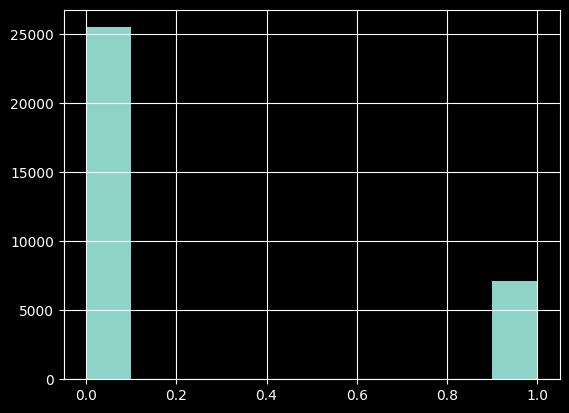

In [7]:
df['loan_status'].hist()

In [8]:
df['loan_status'].mean()

0.21816396059052823

## Skips, Nans:

In [9]:
df.isna().mean().sort_values(ascending=False).reset_index()

,index,0
0,loan_int_rate,0.095639
1,person_emp_length,0.027470
2,person_age,0.000000
3,person_income,0.000000
4,person_home_ownership,0.000000
5,loan_intent,0.000000
6,loan_grade,0.000000
7,loan_amnt,0.000000
8,loan_status,0.000000
9,loan_percent_income,0.000000


In [10]:
df['person_emp_length'].value_counts()

0.0      4105
2.0      3849
3.0      3456
5.0      2946
1.0      2915
4.0      2874
6.0      2666
7.0      2196
8.0      1687
9.0      1367
11.0      740
10.0      696
12.0      575
13.0      426
14.0      335
15.0      238
16.0      165
17.0      129
18.0      104
19.0       64
20.0       42
21.0       38
22.0       19
24.0       10
23.0       10
25.0        8
26.0        6
27.0        5
31.0        4
28.0        3
123.0       2
30.0        2
41.0        1
34.0        1
29.0        1
38.0        1
Name: person_emp_length, dtype: int64

In [11]:
df['person_emp_length'].mean()

4.789686296787225

In [12]:
df['person_emp_length'].median()

4.0

In [13]:
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())

In [14]:
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [15]:
df.isna().mean().sort_values(ascending=False).reset_index()

,index,0
0,person_age,0.0
1,person_income,0.0
2,person_home_ownership,0.0
3,person_emp_length,0.0
4,loan_intent,0.0
5,loan_grade,0.0
6,loan_amnt,0.0
7,loan_int_rate,0.0
8,loan_status,0.0
9,loan_percent_income,0.0


## dtypes

In [16]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [17]:
df['loan_intent'].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [18]:
df['loan_grade'].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [19]:
df['cb_person_default_on_file'].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

# Quick Analysis

## Phik

In [20]:
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']


In [21]:
phik_overview['loan_status'].sort_values(ascending=False).reset_index()

,index,loan_status
0,loan_status,1.000000
1,loan_percent_income,0.523794
2,loan_int_rate,0.463640
3,loan_grade,0.387232
4,person_home_ownership,0.361617
5,cb_person_default_on_file,0.277424
6,loan_intent,0.174894
7,loan_amnt,0.159851
8,cb_person_cred_hist_length,0.030688
9,person_emp_length,0.027745


In [22]:
(phik_overview['loan_status'].sort_values(ascending=False).reset_index()
.style
.highlight_between(left=.3, right=1, subset='loan_status', color='green' )
.highlight_between(left=.1, right=.3, subset='loan_status', color='orange' )
.highlight_between(left=0, right=.1, subset='loan_status', color='blue' )

.format({
    'loan_status': '{:,.2%}'.format,
})
)

,index,loan_status
0,loan_status,100.00%
1,loan_percent_income,52.38%
2,loan_int_rate,46.36%
3,loan_grade,38.72%
4,person_home_ownership,36.16%
5,cb_person_default_on_file,27.74%
6,loan_intent,17.49%
7,loan_amnt,15.99%
8,cb_person_cred_hist_length,3.07%
9,person_emp_length,2.77%


In [23]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


### loan_int_rate

In [24]:
df['loan_int_rate_group'] = pd.qcut(df['loan_int_rate'],6)

In [25]:
df.groupby('loan_int_rate_group')['loan_status'].agg(['count', 'mean',])

,count,mean
loan_int_rate_group,,
"(5.419, 7.51]",6016,0.087434
"(7.51, 9.91]",4989,0.129485
"(9.91, 10.99]",7031,0.182193
"(10.99, 12.21]",3819,0.172296
"(12.21, 14.11]",5321,0.226085
"(14.11, 23.22]",5405,0.516929


<AxesSubplot: xlabel='loan_int_rate_group'>

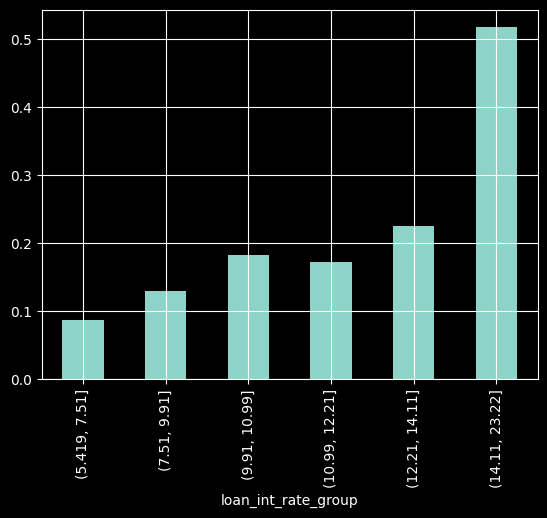

In [26]:
df.groupby('loan_int_rate_group')['loan_status'].mean().plot(ylim=0, grid=True,kind='bar')

In [27]:
(df.groupby(['loan_int_rate_group'])['loan_status']
.agg(['count', 'mean'])
.style
.highlight_between(left=.3, right=1, subset='mean', color='red' )
.highlight_between(left=.15, right=.4, subset='mean', color='orange' )
.highlight_between(left=0, right=.15, subset='mean', color='green' )

.format({
    'mean': '{:,.2%}'.format,
})
)

,count,mean
loan_int_rate_group,,
"(5.419, 7.51]",6016,8.74%
"(7.51, 9.91]",4989,12.95%
"(9.91, 10.99]",7031,18.22%
"(10.99, 12.21]",3819,17.23%
"(12.21, 14.11]",5321,22.61%
"(14.11, 23.22]",5405,51.69%


### person_home_ownership

In [28]:
df.groupby('person_home_ownership')['loan_status'].agg(['count', 'mean',])

,count,mean
person_home_ownership,,
MORTGAGE,13444,0.125707
OTHER,107,0.308411
OWN,2584,0.074690
RENT,16446,0.315700


In [29]:
(df.groupby(['person_home_ownership'])['loan_status']
.agg(['count', 'mean'])
.style
.highlight_between(left=.3, right=1, subset='mean', color='red' )
.highlight_between(left=.15, right=.3, subset='mean', color='orange' )
.highlight_between(left=0, right=.15, subset='mean', color='green' )
 
.highlight_between(left=10000, right=20000, subset='count', color='blue' )

.format({
    'mean': '{:,.2%}'.format,
    'count': '{:}'.format,
})
)

,count,mean
person_home_ownership,,
MORTGAGE,13444,12.57%
OTHER,107,30.84%
OWN,2584,7.47%
RENT,16446,31.57%


### cb_person_default_on_file

In [30]:
df.groupby('cb_person_default_on_file')['loan_status'].agg(['count', 'mean',])

,count,mean
cb_person_default_on_file,,
N,26836,0.183932
Y,5745,0.378068


# Features Engineering:

In [31]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_int_rate_group
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,"(14.11, 23.22]"
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,"(10.99, 12.21]"
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,"(12.21, 14.11]"
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,"(14.11, 23.22]"
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,"(14.11, 23.22]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,"(12.21, 14.11]"
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,"(5.419, 7.51]"
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,"(9.91, 10.99]"
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,"(10.99, 12.21]"


In [32]:
df.drop('loan_int_rate_group', axis=1, inplace=True)

In [33]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


## Convert categorical variables into numerical

In [34]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [35]:
df.select_dtypes(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N
32577,MORTGAGE,PERSONAL,A,N
32578,RENT,HOMEIMPROVEMENT,B,N
32579,MORTGAGE,PERSONAL,B,N


### cb_person_default_on_file

In [36]:
df['cb_person_default_on_file'].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

In [37]:
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'N' : 0, 'Y' : 1})

In [38]:
df['cb_person_default_on_file'].value_counts()

0    26836
1     5745
Name: cb_person_default_on_file, dtype: int64

### loan_grade

In [39]:
df['loan_grade'].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [40]:
pd.get_dummies(df['loan_grade'],prefix='loan_grade')

,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
32576,0,0,1,0,0,0,0
32577,1,0,0,0,0,0,0
32578,0,1,0,0,0,0,0
32579,0,1,0,0,0,0,0


In [41]:
df_dum = pd.get_dummies(df['loan_grade'],prefix='loan_grade')
df_dum

,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
32576,0,0,1,0,0,0,0
32577,1,0,0,0,0,0,0
32578,0,1,0,0,0,0,0
32579,0,1,0,0,0,0,0


In [42]:
df = pd.concat([df,df_dum],axis=1)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,1,3,0,0,0,1,0,0,0
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,0,2,0,1,0,0,0,0,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,0,3,0,0,1,0,0,0,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,0,2,0,0,1,0,0,0,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,1,4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,0,30,0,0,1,0,0,0,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,0,19,1,0,0,0,0,0,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,0,28,0,1,0,0,0,0,0
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,0,26,0,1,0,0,0,0,0


### loan_intent

In [43]:
df['loan_intent'].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [44]:
pd.get_dummies(df['loan_intent'],prefix='loan_intent')

,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,0,0,0,0,1,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
32576,0,0,0,0,1,0
32577,0,0,0,0,1,0
32578,0,0,1,0,0,0
32579,0,0,0,0,1,0


In [45]:
df_dum = pd.get_dummies(df['loan_intent'],prefix='loan_intent')
df_dum

,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,0,0,0,0,1,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
32576,0,0,0,0,1,0
32577,0,0,0,0,1,0
32578,0,0,1,0,0,0
32579,0,0,0,0,1,0


In [46]:
df = pd.concat([df,df_dum],axis=1)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,...,1,0,0,0,0,0,0,0,1,0
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,...,0,0,0,0,0,1,0,0,0,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,...,0,0,0,0,0,0,0,1,0,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,...,0,0,0,0,0,0,0,1,0,0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,...,0,0,0,0,0,0,0,0,1,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,...,0,0,0,0,0,0,0,0,1,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,...,0,0,0,0,0,0,1,0,0,0
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,...,0,0,0,0,0,0,0,0,1,0


### person_home_ownership

In [47]:
df['person_home_ownership'].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [48]:
pd.get_dummies(df['person_home_ownership'],prefix='person_home_ownership')

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,0,0,0,1
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
32576,1,0,0,0
32577,1,0,0,0
32578,0,0,0,1
32579,1,0,0,0


In [49]:
df_dum = pd.get_dummies(df['person_home_ownership'],prefix='person_home_ownership')
df_dum

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,0,0,0,1
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
32576,1,0,0,0
32577,1,0,0,0
32578,0,0,0,1
32579,1,0,0,0


In [50]:
df = pd.concat([df,df_dum],axis=1)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,...,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,...,0,1,0,0,0,0,0,0,1,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,...,0,0,0,1,0,0,1,0,0,0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,...,0,0,0,1,0,0,0,0,0,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,...,0,0,0,0,1,0,1,0,0,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,...,0,0,0,0,1,0,1,0,0,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,...,0,0,1,0,0,0,0,0,0,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,...,0,0,0,0,1,0,1,0,0,0


In [51]:
df.select_dtypes(include='object')

,person_home_ownership,loan_intent,loan_grade
0,RENT,PERSONAL,D
1,OWN,EDUCATION,B
2,MORTGAGE,MEDICAL,C
3,RENT,MEDICAL,C
4,RENT,MEDICAL,C
...,...,...,...
32576,MORTGAGE,PERSONAL,C
32577,MORTGAGE,PERSONAL,A
32578,RENT,HOMEIMPROVEMENT,B
32579,MORTGAGE,PERSONAL,B


In [52]:
df.drop('person_home_ownership', axis=1, inplace=True)
df.drop('loan_intent', axis=1, inplace=True)
df.drop('loan_grade', axis=1, inplace=True)
df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_A,...,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,22,59000,123.0,35000,16.02,1,0.59,1,3,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,0,2,0,...,0,1,0,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,0,3,0,...,0,0,0,1,0,0,1,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,0,2,0,...,0,0,0,1,0,0,0,0,0,1
4,24,54400,8.0,35000,14.27,1,0.55,1,4,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,0,30,0,...,0,0,0,0,1,0,1,0,0,0
32577,54,120000,4.0,17625,7.49,0,0.15,0,19,1,...,0,0,0,0,1,0,1,0,0,0
32578,65,76000,3.0,35000,10.99,1,0.46,0,28,0,...,0,0,1,0,0,0,0,0,0,1
32579,56,150000,5.0,15000,11.48,0,0.10,0,26,0,...,0,0,0,0,1,0,1,0,0,0


In [53]:
df.dtypes

person_age                          int64
person_income                       int64
person_emp_length                 float64
loan_amnt                           int64
loan_int_rate                     float64
loan_status                         int64
loan_percent_income               float64
cb_person_default_on_file           int64
cb_person_cred_hist_length          int64
loan_grade_A                        uint8
loan_grade_B                        uint8
loan_grade_C                        uint8
loan_grade_D                        uint8
loan_grade_E                        uint8
loan_grade_F                        uint8
loan_grade_G                        uint8
loan_intent_DEBTCONSOLIDATION       uint8
loan_intent_EDUCATION               uint8
loan_intent_HOMEIMPROVEMENT         uint8
loan_intent_MEDICAL                 uint8
loan_intent_PERSONAL                uint8
loan_intent_VENTURE                 uint8
person_home_ownership_MORTGAGE      uint8
person_home_ownership_OTHER       

## Define X and y:

In [54]:
df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_A,...,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,22,59000,123.0,35000,16.02,1,0.59,1,3,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,0,2,0,...,0,1,0,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,0,3,0,...,0,0,0,1,0,0,1,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,0,2,0,...,0,0,0,1,0,0,0,0,0,1
4,24,54400,8.0,35000,14.27,1,0.55,1,4,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,0,30,0,...,0,0,0,0,1,0,1,0,0,0
32577,54,120000,4.0,17625,7.49,0,0.15,0,19,1,...,0,0,0,0,1,0,1,0,0,0
32578,65,76000,3.0,35000,10.99,1,0.46,0,28,0,...,0,0,1,0,0,0,0,0,0,1
32579,56,150000,5.0,15000,11.48,0,0.10,0,26,0,...,0,0,0,0,1,0,1,0,0,0


In [55]:
X = df.drop("loan_status", axis = 1)
y = df["loan_status"]

In [56]:
X

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_A,loan_grade_B,...,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,22,59000,123.0,35000,16.02,0.59,1,3,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0.10,0,2,0,1,...,0,1,0,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,0.57,0,3,0,0,...,0,0,0,1,0,0,1,0,0,0
3,23,65500,4.0,35000,15.23,0.53,0,2,0,0,...,0,0,0,1,0,0,0,0,0,1
4,24,54400,8.0,35000,14.27,0.55,1,4,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0.11,0,30,0,0,...,0,0,0,0,1,0,1,0,0,0
32577,54,120000,4.0,17625,7.49,0.15,0,19,1,0,...,0,0,0,0,1,0,1,0,0,0
32578,65,76000,3.0,35000,10.99,0.46,0,28,0,1,...,0,0,1,0,0,0,0,0,0,1
32579,56,150000,5.0,15000,11.48,0.10,0,26,0,1,...,0,0,0,0,1,0,1,0,0,0


In [57]:
y

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 32581, dtype: int64

## Split the datasets into train and test sets:
- train 80%
- test 20%

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [59]:
len(X_train) / len(df)

0.7999754458119763

In [60]:
len(X_test) / len(df)

0.2000245541880237

In [61]:
X_train.dtypes

person_age                          int64
person_income                       int64
person_emp_length                 float64
loan_amnt                           int64
loan_int_rate                     float64
loan_percent_income               float64
cb_person_default_on_file           int64
cb_person_cred_hist_length          int64
loan_grade_A                        uint8
loan_grade_B                        uint8
loan_grade_C                        uint8
loan_grade_D                        uint8
loan_grade_E                        uint8
loan_grade_F                        uint8
loan_grade_G                        uint8
loan_intent_DEBTCONSOLIDATION       uint8
loan_intent_EDUCATION               uint8
loan_intent_HOMEIMPROVEMENT         uint8
loan_intent_MEDICAL                 uint8
loan_intent_PERSONAL                uint8
loan_intent_VENTURE                 uint8
person_home_ownership_MORTGAGE      uint8
person_home_ownership_OTHER         uint8
person_home_ownership_OWN         

In [62]:
X_train

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_A,loan_grade_B,...,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
32377,64,46000,2.0,4800,11.09,0.10,1,24,0,0,...,0,0,0,0,1,0,0,0,0,1
1338,26,26000,0.0,8500,16.45,0.33,0,3,0,0,...,1,0,0,0,0,0,0,0,1,0
7047,23,51000,3.0,16000,13.11,0.31,1,3,0,0,...,0,0,0,0,1,0,1,0,0,0
8225,22,56004,6.0,6000,7.88,0.11,0,4,1,0,...,0,0,0,1,0,0,1,0,0,0
7178,24,79000,3.0,7000,12.54,0.09,0,3,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,39,38500,7.0,3500,13.98,0.09,1,17,0,0,...,0,0,0,1,0,0,1,0,0,0
5390,25,69000,5.0,8500,6.92,0.12,0,4,1,0,...,0,0,1,0,0,0,0,0,0,1
860,26,148000,1.0,20000,17.99,0.14,0,3,0,0,...,1,0,0,0,0,0,0,0,0,1
15795,26,175000,0.0,15000,10.99,0.09,0,3,0,0,...,0,0,0,0,1,0,1,0,0,0


In [63]:
y_train

32377    0
1338     1
7047     0
8225     0
7178     0
        ..
29802    0
5390     1
860      1
15795    0
23654    0
Name: loan_status, Length: 26064, dtype: int64

## Standardization:

In [64]:
X_train.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_A,loan_grade_B,...,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
count,26064.000000,2.606400e+04,26064.000000,26064.000000,26064.000000,26064.000000,26064.000000,26064.000000,26064.000000,26064.000000,...,26064.000000,26064.000000,26064.000000,26064.000000,26064.000000,26064.000000,26064.000000,26064.000000,26064.000000,26064.000000
mean,27.764695,6.617184e+04,4.765577,9601.073320,11.008203,0.170446,0.174570,5.816720,0.330533,0.321862,...,0.161756,0.197360,0.110689,0.185812,0.170196,0.174187,0.412792,0.003184,0.079497,0.504527
std,6.392500,6.359933e+04,4.054371,6315.753396,3.071511,0.106991,0.379606,4.054342,0.470414,0.467199,...,0.368234,0.398014,0.313753,0.388962,0.375812,0.379277,0.492345,0.056342,0.270518,0.499989
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.900000e+04,2.000000,5000.000000,8.490000,0.090000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,0.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,30.000000,7.950000e+04,7.000000,12250.000000,13.110000,0.230000,0.000000,8.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,22.480000,0.780000,1.000000,30.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
X_train

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_A,loan_grade_B,...,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
32377,64,46000,2.0,4800,11.09,0.10,1,24,0,0,...,0,0,0,0,1,0,0,0,0,1
1338,26,26000,0.0,8500,16.45,0.33,0,3,0,0,...,1,0,0,0,0,0,0,0,1,0
7047,23,51000,3.0,16000,13.11,0.31,1,3,0,0,...,0,0,0,0,1,0,1,0,0,0
8225,22,56004,6.0,6000,7.88,0.11,0,4,1,0,...,0,0,0,1,0,0,1,0,0,0
7178,24,79000,3.0,7000,12.54,0.09,0,3,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,39,38500,7.0,3500,13.98,0.09,1,17,0,0,...,0,0,0,1,0,0,1,0,0,0
5390,25,69000,5.0,8500,6.92,0.12,0,4,1,0,...,0,0,1,0,0,0,0,0,0,1
860,26,148000,1.0,20000,17.99,0.14,0,3,0,0,...,1,0,0,0,0,0,0,0,0,1
15795,26,175000,0.0,15000,10.99,0.09,0,3,0,0,...,0,0,0,0,1,0,1,0,0,0


In [66]:
# Initiate scaler
sc = StandardScaler()

# Standardize the training dataset
X_train = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)

# Standardized the testing dataset
X_test = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)

# Summary statistics after standardization
X_train.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_A,loan_grade_B,...,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
count,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,...,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04,2.606400e+04
mean,1.346716e-16,-2.794300e-18,-1.164064e-16,1.261524e-16,-7.428748e-16,-3.489467e-17,-6.133829e-17,1.341264e-16,-8.941759e-17,2.508054e-17,...,5.261462e-17,1.003222e-16,-3.026022e-17,8.853160e-17,4.634448e-18,2.698885e-17,4.504957e-17,3.271375e-18,5.997522e-17,5.670384e-17
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,...,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-1.214680e+00,-9.775737e-01,-1.175440e+00,-1.441039e+00,-1.819401e+00,-1.593113e+00,-4.598806e-01,-9.414089e-01,-7.026554e-01,-6.889305e-01,...,-4.392831e-01,-4.958721e-01,-3.527976e-01,-4.777210e-01,-4.528846e-01,-4.592683e-01,-8.384348e-01,-5.652117e-02,-2.938743e-01,-1.009096e+00
25%,-7.453713e-01,-4.272429e-01,-6.821354e-01,-7.285214e-01,-8.198736e-01,-7.519061e-01,-4.598806e-01,-6.947550e-01,-7.026554e-01,-6.889305e-01,...,-4.392831e-01,-4.958721e-01,-3.527976e-01,-4.777210e-01,-4.528846e-01,-4.592683e-01,-8.384348e-01,-5.652117e-02,-2.938743e-01,-1.009096e+00
50%,-2.760623e-01,-1.756631e-01,-1.888312e-01,-2.535096e-01,-5.926475e-03,-1.911018e-01,-4.598806e-01,-4.481011e-01,-7.026554e-01,-6.889305e-01,...,-4.392831e-01,-4.958721e-01,-3.527976e-01,-4.777210e-01,-4.528846e-01,-4.592683e-01,-8.384348e-01,-5.652117e-02,-2.938743e-01,9.909860e-01
75%,3.496830e-01,2.095684e-01,5.511251e-01,4.194238e-01,6.843007e-01,5.566373e-01,-4.598806e-01,5.385144e-01,1.423173e+00,1.451525e+00,...,-4.392831e-01,-4.958721e-01,-3.527976e-01,-4.777210e-01,-4.528846e-01,-4.592683e-01,1.192699e+00,-5.652117e-02,-2.938743e-01,9.909860e-01
max,1.818342e+01,9.330195e+01,2.916277e+01,4.021597e+00,3.734975e+00,5.697344e+00,2.174477e+00,5.964900e+00,1.423173e+00,1.451525e+00,...,2.276437e+00,2.016649e+00,2.834487e+00,2.093272e+00,2.208068e+00,2.177377e+00,1.192699e+00,1.769249e+01,3.402815e+00,9.909860e-01


In [67]:
X_train.dtypes

person_age                        float64
person_income                     float64
person_emp_length                 float64
loan_amnt                         float64
loan_int_rate                     float64
loan_percent_income               float64
cb_person_default_on_file         float64
cb_person_cred_hist_length        float64
loan_grade_A                      float64
loan_grade_B                      float64
loan_grade_C                      float64
loan_grade_D                      float64
loan_grade_E                      float64
loan_grade_F                      float64
loan_grade_G                      float64
loan_intent_DEBTCONSOLIDATION     float64
loan_intent_EDUCATION             float64
loan_intent_HOMEIMPROVEMENT       float64
loan_intent_MEDICAL               float64
loan_intent_PERSONAL              float64
loan_intent_VENTURE               float64
person_home_ownership_MORTGAGE    float64
person_home_ownership_OTHER       float64
person_home_ownership_OWN         

In [68]:
X_train

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_A,loan_grade_B,...,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
32377,5.668518,-0.317177,-0.682135,-0.760189,0.026631,-0.658439,2.174477,4.484977,-0.702655,-0.68893,...,-0.439283,-0.495872,-0.352798,-0.477721,2.208068,-0.459268,-0.838435,-0.056521,-0.293874,0.990986
1338,-0.276062,-0.631652,-1.175440,-0.174341,1.771734,1.491311,-0.459881,-0.694755,-0.702655,-0.68893,...,2.276437,-0.495872,-0.352798,-0.477721,-0.452885,-0.459268,-0.838435,-0.056521,3.402815,-1.009096
7047,-0.745371,-0.238558,-0.435483,1.013189,0.684301,1.304376,2.174477,-0.694755,-0.702655,-0.68893,...,-0.439283,-0.495872,-0.352798,-0.477721,2.208068,-0.459268,1.192699,-0.056521,-0.293874,-1.009096
8225,-0.901808,-0.159877,0.304473,-0.570184,-1.018477,-0.564971,-0.459881,-0.448101,1.423173,-0.68893,...,-0.439283,-0.495872,-0.352798,2.093272,-0.452885,-0.459268,1.192699,-0.056521,-0.293874,-1.009096
7178,-0.588935,0.201707,-0.435483,-0.411847,0.498721,-0.751906,-0.459881,-0.694755,-0.702655,-0.68893,...,-0.439283,-0.495872,-0.352798,-0.477721,2.208068,-0.459268,-0.838435,-0.056521,-0.293874,0.990986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,1.757610,-0.435105,0.551125,-0.966027,0.967554,-0.751906,2.174477,2.758399,-0.702655,-0.68893,...,-0.439283,-0.495872,-0.352798,2.093272,-0.452885,-0.459268,1.192699,-0.056521,-0.293874,-1.009096
5390,-0.432499,0.044469,0.057821,-0.174341,-1.331032,-0.471504,-0.459881,-0.448101,1.423173,-0.68893,...,-0.439283,-0.495872,2.834487,-0.477721,-0.452885,-0.459268,-0.838435,-0.056521,-0.293874,0.990986
860,-0.276062,1.286644,-0.928787,1.646538,2.273126,-0.284569,-0.459881,-0.694755,-0.702655,-0.68893,...,2.276437,-0.495872,-0.352798,-0.477721,-0.452885,-0.459268,-0.838435,-0.056521,-0.293874,0.990986
15795,-0.276062,1.711185,-1.175440,0.854851,-0.005926,-0.751906,-0.459881,-0.694755,-0.702655,-0.68893,...,-0.439283,-0.495872,-0.352798,-0.477721,2.208068,-0.459268,1.192699,-0.056521,-0.293874,-1.009096


# XGBoost:

## XGBoost default params:

In [69]:
xgb_model_1 = XGBClassifier()

In [70]:
xgb_model_1.fit(
          X_train,
          y_train,
          eval_set=[(X_test, y_test)],
)

[0]	validation_0-logloss:0.50782
[1]	validation_0-logloss:0.40848
[2]	validation_0-logloss:0.34710
[3]	validation_0-logloss:0.30914
[4]	validation_0-logloss:0.28100
[5]	validation_0-logloss:0.26337
[6]	validation_0-logloss:0.25136
[7]	validation_0-logloss:0.24246
[8]	validation_0-logloss:0.23540
[9]	validation_0-logloss:0.22891
[10]	validation_0-logloss:0.22420
[11]	validation_0-logloss:0.22147
[12]	validation_0-logloss:0.21995
[13]	validation_0-logloss:0.21570
[14]	validation_0-logloss:0.21430
[15]	validation_0-logloss:0.21330
[16]	validation_0-logloss:0.21123
[17]	validation_0-logloss:0.20776
[18]	validation_0-logloss:0.20566
[19]	validation_0-logloss:0.20532
[20]	validation_0-logloss:0.20431
[21]	validation_0-logloss:0.20270
[22]	validation_0-logloss:0.20178
[23]	validation_0-logloss:0.20129
[24]	validation_0-logloss:0.19997
[25]	validation_0-logloss:0.19901
[26]	validation_0-logloss:0.19915
[27]	validation_0-logloss:0.19839
[28]	validation_0-logloss:0.19791
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [71]:
y_pred1 = xgb_model_1.predict(X_test)

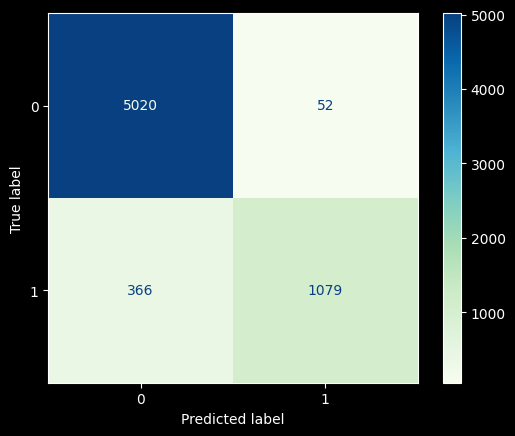

In [72]:
ConfusionMatrixDisplay.from_estimator(xgb_model_1, X_test, y_test, cmap='GnBu')
plt.show()

In [73]:
print('Precision: %.3f' % precision_score(y_test, y_pred1))
print('Recall: %.3f' % recall_score(y_test, y_pred1))
print('F1: %.3f' % f1_score(y_test, y_pred1))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred1))

Precision: 0.954
Recall: 0.747
F1: 0.838
Accuracy: 0.936


## XGBoost grid_search

In [74]:
xgb_model_2 = XGBClassifier()

In [75]:
gbm_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators':[200],
    'subsample':[0.3, 0.5, 0.8],
}

In [76]:
grid_search = GridSearchCV(
    estimator=xgb_model_2,
    param_grid=gbm_param_grid,
    scoring='recall',
    cv=5,
    verbose=1    
)

In [77]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [200], 'subsample': [0.3, 0.5, 0.8]},
             scoring='recall', verbose=1)

In [78]:
print(f'The best score is {grid_search.best_score_:.4f}')
print(f'The best hyperparameters are {grid_search.best_params_}')

The best score is 0.7309
The best hyperparameters are {'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.8}


In [79]:
# Make prediction using the best model
grid_predict = grid_search.predict(X_test)
# Get predicted probabilities
grid_predict_prob = grid_search.predict_proba(X_test)[:,1]

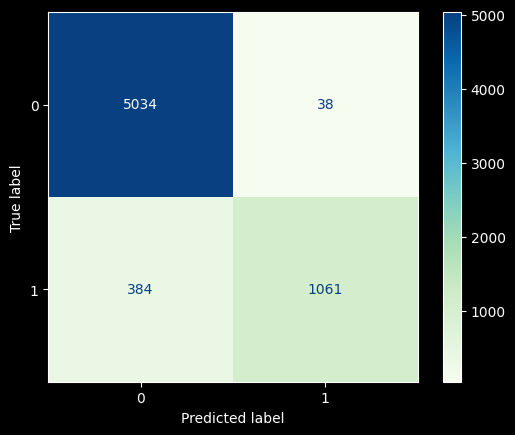

In [80]:
ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test, cmap='GnBu')
plt.show()

In [81]:
print('Precision: %.3f' % precision_score(y_test, grid_predict))
print('Recall: %.3f' % recall_score(y_test, grid_predict))
print('F1: %.3f' % f1_score(y_test, grid_predict))
print('Accuracy: %.3f' % accuracy_score(y_test, grid_predict))

Precision: 0.965
Recall: 0.734
F1: 0.834
Accuracy: 0.935


## XGBoost random_search

In [82]:
xgb_model_3 = XGBClassifier()

In [83]:
gbm_param_grid = {
    'learning_rate': np.arange(0.01, 0.05, 0.1),
    'n_estimators':[200],
    'subsample':np.arange(0.3, 0.5, 0.8),
}

In [84]:
random_search = RandomizedSearchCV(
    estimator=xgb_model_3,
    param_distributions=gbm_param_grid,
    n_iter=20,
    scoring='recall',
    cv=5,
    verbose=1    
)

In [85]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/antonius/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=20,
                   param_distributions={'learning_rate': array([0.01]),
                                        'n_estimators': [200],
                                        'subsample': array([0.3])},
                   scoring='recall', verbose=1)

In [86]:
print(f'The best score is {random_search.best_score_:.4f}')
print(f'The best hyperparameters are {random_search.best_params_}')

The best score is 0.6790
The best hyperparameters are {'subsample': 0.3, 'n_estimators': 200, 'learning_rate': 0.01}


In [87]:
# Make prediction using the best model
random_predict = random_search.predict(X_test)
# Get predicted probabilities
random_predict_prob = random_search.predict_proba(X_test)[:,1]

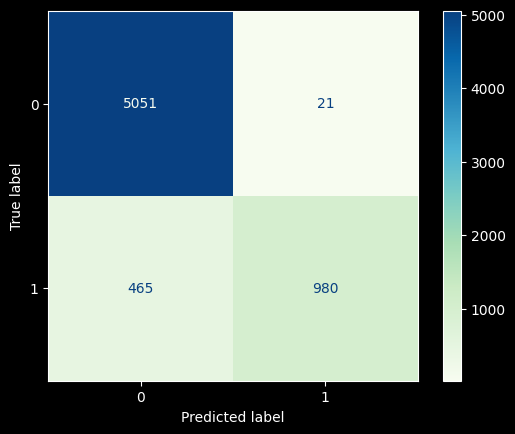

In [88]:
ConfusionMatrixDisplay.from_estimator(random_search, X_test, y_test, cmap='GnBu')
plt.show()

In [89]:
print('Precision: %.3f' % precision_score(y_test, random_predict))
print('Recall: %.3f' % recall_score(y_test, random_predict))
print('F1: %.3f' % f1_score(y_test, random_predict))
print('Accuracy: %.3f' % accuracy_score(y_test, random_predict))

Precision: 0.979
Recall: 0.678
F1: 0.801
Accuracy: 0.925


## XGBoost Bayesian Optimization

In [90]:
space = {
    'learning_rate': hp.choice('learning_rate', [0.0001,0.001, 0.01, 0.1, 1]),
    'max_depth' : hp.choice('max_depth', range(3,21,3)),
    'gamma' : hp.choice('gamma', [i/10.0 for i in range(0,5)]),
    'colsample_bytree' : hp.choice('colsample_bytree', [i/10.0 for i in range(3,10)]),     
    'reg_alpha' : hp.choice('reg_alpha', [1e-5, 1e-2, 0.1, 1, 10, 100]), 
    'reg_lambda' : hp.choice('reg_lambda', [1e-5, 1e-2, 0.1, 1, 10, 100])
}

In [91]:
# Set up the k-fold cross-validation
kfold = StratifiedKFold(
    n_splits=3,
    shuffle=True,
    random_state=0)

In [92]:
# Objective function
def objective(params):
    
    xgboost = XGBClassifier(seed=42, **params)
    score = cross_val_score(estimator=xgboost, 
                            X=X_train, 
                            y=y_train, 
                            cv=kfold, 
                            scoring='recall', 
                            n_jobs=-1).mean()

    # Loss is negative score
    loss = - score

    # Dictionary with information for evaluation
    return {'loss': loss, 'params': params, 'status': STATUS_OK}

In [93]:
# Optimize
best = fmin(
    fn = objective,
    space = space,
    algo = tpe.suggest,
    max_evals = 48,
    trials = Trials())

100%|█████████| 48/48 [02:32<00:00,  3.17s/trial, best loss: -0.763729176584361]


In [94]:
# Print the index of the best parameters
print(best)

# Print the values of the best parameters
print(space_eval(space, best))

{'colsample_bytree': 6, 'gamma': 4, 'learning_rate': 4, 'max_depth': 1, 'reg_alpha': 1, 'reg_lambda': 1}
{'colsample_bytree': 0.9, 'gamma': 0.4, 'learning_rate': 1, 'max_depth': 6, 'reg_alpha': 0.01, 'reg_lambda': 0.01}


In [95]:
# Train model using the best parameters
xgboost_bo = XGBClassifier(seed=0, 
                           colsample_bytree=space_eval(space, best)['colsample_bytree'], 
                           gamma=space_eval(space, best)['gamma'], 
                           learning_rate=space_eval(space, best)['learning_rate'], 
                           max_depth=space_eval(space, best)['max_depth'], 
                           reg_alpha=space_eval(space, best)['reg_alpha'],
                           reg_lambda=space_eval(space, best)['reg_lambda']
                           ).fit(X_train,y_train)

In [96]:
# Make prediction using the best model
bayesian_opt_predict = xgboost_bo.predict(X_test)

# Get predicted probabilities
bayesian_opt_predict_prob = xgboost_bo.predict_proba(X_test)[:,1]

# Get performance metrics
precision, recall, fscore, support = score(y_test, bayesian_opt_predict)

# Print result
print(f'The recall value for the xgboost Bayesian optimization is {recall[1]:.4f}')

The recall value for the xgboost Bayesian optimization is 0.7702


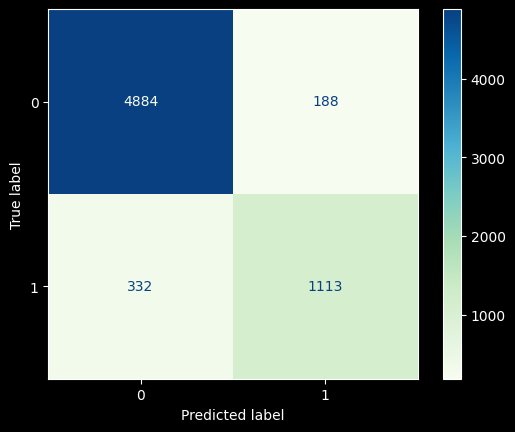

In [97]:
ConfusionMatrixDisplay.from_estimator(xgboost_bo, X_test, y_test, cmap='GnBu')
plt.show()

In [98]:
print('Precision: %.3f' % precision_score(y_test, bayesian_opt_predict))
print('Recall: %.3f' % recall_score(y_test, bayesian_opt_predict))
print('F1: %.3f' % f1_score(y_test, bayesian_opt_predict))
print('Accuracy: %.3f' % accuracy_score(y_test, bayesian_opt_predict))

Precision: 0.855
Recall: 0.770
F1: 0.811
Accuracy: 0.920


## XGBoost Optuna

In [128]:
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
    }

    # Fit the model
    optuna_model = XGBClassifier(**params)
    optuna_model.fit(X_train, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [129]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [130]:
study = optuna.create_study(direction='maximize',study_name='XGBoost_optuna')

In [132]:
study.optimize(objective, n_trials=100, show_progress_bar=True)

/home/antonius/.local/lib/python3.10/site-packages/optuna/progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/100 [00:00<?, ?it/s]

In [133]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))


Number of finished trials: 200
Best trial:
  Value: 0.9386220653675004
  Params: 
    max_depth: 9
    learning_rate: 0.13758787269616693
    n_estimators: 343
    min_child_weight: 1
    gamma: 0.7747359901144883
    subsample: 0.9785668163610722
    colsample_bytree: 0.776951625736105
    reg_alpha: 0.6729248528031907
    reg_lambda: 0.5902030978617224


In [134]:
trial.params

{'max_depth': 9,
 'learning_rate': 0.13758787269616693,
 'n_estimators': 343,
 'min_child_weight': 1,
 'gamma': 0.7747359901144883,
 'subsample': 0.9785668163610722,
 'colsample_bytree': 0.776951625736105,
 'reg_alpha': 0.6729248528031907,
 'reg_lambda': 0.5902030978617224}

/tmp/ipykernel_2713/2122237422.py:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  plot_param_importances(study);


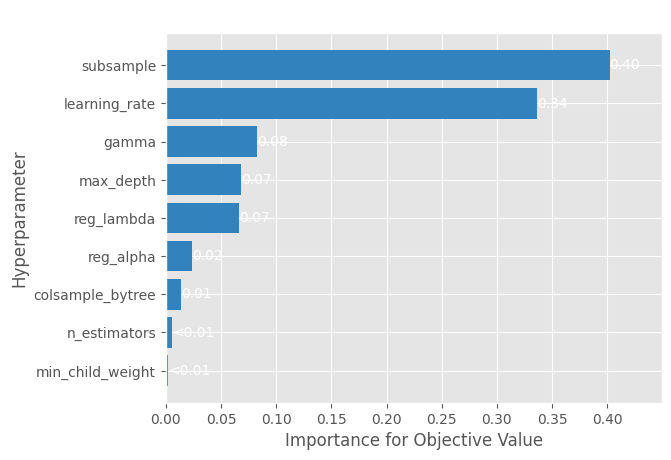

In [135]:
plot_param_importances(study);

In [136]:
params = trial.params

In [137]:
trial.params

{'max_depth': 9,
 'learning_rate': 0.13758787269616693,
 'n_estimators': 343,
 'min_child_weight': 1,
 'gamma': 0.7747359901144883,
 'subsample': 0.9785668163610722,
 'colsample_bytree': 0.776951625736105,
 'reg_alpha': 0.6729248528031907,
 'reg_lambda': 0.5902030978617224}

In [138]:
xgb_model_5 = XGBClassifier(**params)

In [139]:
xgb_model_5.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.776951625736105, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.7747359901144883, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.13758787269616693, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=343, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [140]:
y_pred5 = xgb_model_5.predict(X_test)

In [141]:
accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))

Accuracy after tuning: 93.86%


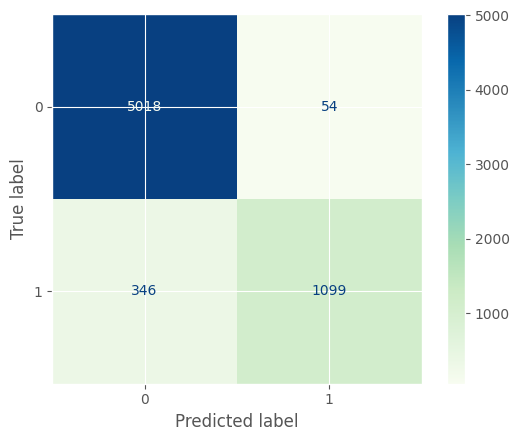

In [142]:
ConfusionMatrixDisplay.from_estimator(xgb_model_5, X_test, y_test, cmap='GnBu')
plt.show()

In [143]:
print('Precision: %.3f' % precision_score(y_test, y_pred5))
print('Recall: %.3f' % recall_score(y_test, y_pred5))
print('F1: %.3f' % f1_score(y_test, y_pred5))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred5))

Precision: 0.953
Recall: 0.761
F1: 0.846
Accuracy: 0.939


# Catboost

## catboost default param

In [114]:
params = {'verbose':100,
          'random_seed':42,
         }

In [115]:
cbt_model_1 = CatBoostClassifier(**params)

In [116]:
cbt_model_1.fit(
          X_train,
          y_train,
          eval_set=[(X_test, y_test)],
)

Learning rate set to 0.070904
0:	learn: 0.6211947	test: 0.6226298	best: 0.6226298 (0)	total: 62.9ms	remaining: 1m 2s
100:	learn: 0.2028816	test: 0.2126297	best: 0.2126297 (100)	total: 691ms	remaining: 6.15s
200:	learn: 0.1832728	test: 0.2017154	best: 0.2017154 (200)	total: 1.42s	remaining: 5.63s
300:	learn: 0.1686521	test: 0.1955260	best: 0.1955084 (299)	total: 2.05s	remaining: 4.77s
400:	learn: 0.1582814	test: 0.1924637	best: 0.1924147 (397)	total: 2.68s	remaining: 4.01s
500:	learn: 0.1497607	test: 0.1903697	best: 0.1903697 (500)	total: 3.31s	remaining: 3.3s
600:	learn: 0.1419478	test: 0.1890293	best: 0.1890035 (597)	total: 3.95s	remaining: 2.62s
700:	learn: 0.1352015	test: 0.1884480	best: 0.1882886 (683)	total: 4.57s	remaining: 1.95s
800:	learn: 0.1286233	test: 0.1875917	best: 0.1875917 (800)	total: 5.21s	remaining: 1.29s
900:	learn: 0.1225147	test: 0.1874360	best: 0.1872840 (851)	total: 5.86s	remaining: 644ms
999:	learn: 0.1165951	test: 0.1864739	best: 0.1864739 (999)	total: 6.48s	r

In [117]:
y_pred_cbt_1 = cbt_model_1.predict(X_test)

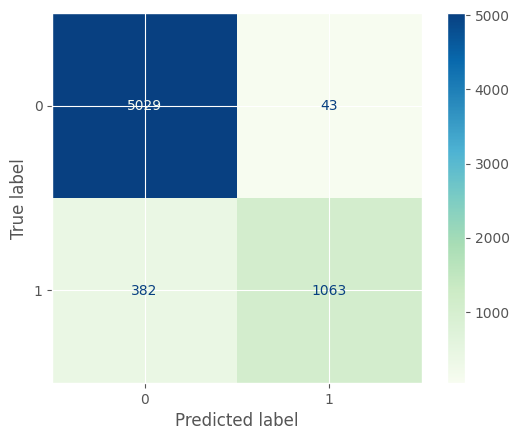

In [118]:
ConfusionMatrixDisplay.from_estimator(cbt_model_1, X_test, y_test, cmap='GnBu')
plt.show()

In [119]:
print('Precision: %.3f' % precision_score(y_test, y_pred_cbt_1))
print('Recall: %.3f' % recall_score(y_test, y_pred_cbt_1))
print('F1: %.3f' % f1_score(y_test, y_pred_cbt_1))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_cbt_1))

Precision: 0.961
Recall: 0.736
F1: 0.833
Accuracy: 0.935


## cbt model 2

In [120]:
parameters = {
    'iterations':15000,
    'verbose':300,
    'od_type' : "Iter",
    'od_wait' : 500,
    'random_seed':42
}

In [121]:
model_cbt_2 = CatBoostClassifier(**parameters)

In [122]:
model_cbt_2.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
)

Learning rate set to 0.021831
0:	learn: 0.6698747	test: 0.6703642	best: 0.6703642 (0)	total: 6.74ms	remaining: 1m 41s
300:	learn: 0.2049065	test: 0.2142813	best: 0.2142813 (300)	total: 2s	remaining: 1m 37s
600:	learn: 0.1864251	test: 0.2027114	best: 0.2027114 (600)	total: 4.07s	remaining: 1m 37s
900:	learn: 0.1727404	test: 0.1963237	best: 0.1963237 (900)	total: 6.03s	remaining: 1m 34s
1200:	learn: 0.1623200	test: 0.1929111	best: 0.1929111 (1200)	total: 8.02s	remaining: 1m 32s
1500:	learn: 0.1538589	test: 0.1907108	best: 0.1907108 (1500)	total: 9.99s	remaining: 1m 29s
1800:	learn: 0.1460787	test: 0.1891115	best: 0.1891115 (1800)	total: 12s	remaining: 1m 27s
2100:	learn: 0.1394558	test: 0.1879959	best: 0.1879840 (2096)	total: 13.9s	remaining: 1m 25s
2400:	learn: 0.1333634	test: 0.1869689	best: 0.1869576 (2398)	total: 15.9s	remaining: 1m 23s
2700:	learn: 0.1277853	test: 0.1861540	best: 0.1861405 (2660)	total: 17.9s	remaining: 1m 21s
3000:	learn: 0.1227318	test: 0.1855662	best: 0.1855662 (

In [123]:
y_pred_cbt_2 = model_cbt_2.predict(X_test)

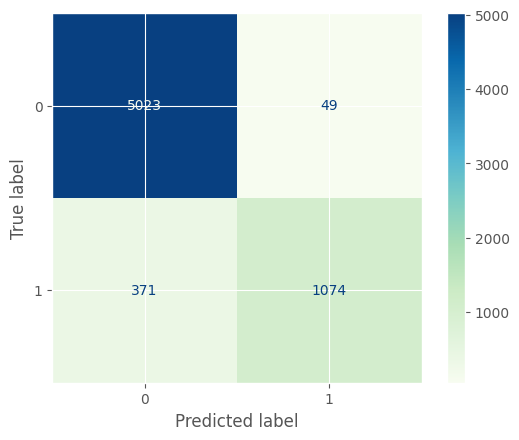

In [124]:
ConfusionMatrixDisplay.from_estimator(model_cbt_2, X_test, y_test, cmap='GnBu')
plt.show()

In [125]:
print('Precision: %.3f' % precision_score(y_test, y_pred_cbt_2))
print('Recall: %.3f' % recall_score(y_test, y_pred_cbt_2))
print('F1: %.3f' % f1_score(y_test, y_pred_cbt_2))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_cbt_2))

Precision: 0.956
Recall: 0.743
F1: 0.836
Accuracy: 0.936


# Summary: 

In [145]:
result = { 'metrics':['Precision','Recall','F1','Accuracy'],
          'xgb_default_param':
              [0.954,
               0.747,
               0.838,
               0.936],
          'xgb_grid_search':
              [0.965,
               0.734,
               0.834,
               0.935],
           'xgb_random_search':
              [0.979,
               0.678,
               0.801,
               0.925],         
           'xgb_bo':
              [0.855,
               0.770,
               0.811,
               0.920],
           'xgb_optuna':
              [0.953,
               0.761,
               0.846,
               0.939],
           'cbt_default_param':
              [0.961,
               0.736,
               0.833,
               0.935],
           'cbt_littleBitTunned':
               [0.956,
                0.743,
                0.836,
                0.936]
}

In [146]:
result_df = pd.DataFrame.from_dict(result)
result_df.T

,0,1,2,3
metrics,Precision,Recall,F1,Accuracy
xgb_default_param,0.954,0.747,0.838,0.936
xgb_grid_search,0.965,0.734,0.834,0.935
xgb_random_search,0.979,0.678,0.801,0.925
xgb_bo,0.855,0.77,0.811,0.92
xgb_optuna,0.953,0.761,0.846,0.939
cbt_default_param,0.961,0.736,0.833,0.935
cbt_littleBitTunned,0.956,0.743,0.836,0.936
